In [37]:
from math import sqrt

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from scipy import stats

In [2]:
df = pd.read_csv('exam_scores.csv')
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   exam_score       40 non-null     float64
 1   hours_studied    40 non-null     float64
 2   study_strategy   20 non-null     object 
 3   handedness       40 non-null     object 
 4   coffee_consumed  40 non-null     int64  
 5   hours_slept      40 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 2.0+ KB


In [5]:
df.study_strategy.value_counts(dropna=False)

flashcards    20
NaN           20
Name: study_strategy, dtype: int64

In [7]:
df.study_strategy = df.study_strategy.fillna("Winged It")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   exam_score       40 non-null     float64
 1   hours_studied    40 non-null     float64
 2   study_strategy   40 non-null     object 
 3   handedness       40 non-null     object 
 4   coffee_consumed  40 non-null     int64  
 5   hours_slept      40 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 2.0+ KB


Do right handed people have higher exam scores?

- $H_0$: there is no difference between right handed people's exam scores and the overall average
- $H_a$: there is a difference between right handed people's exam scores and the overall average

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


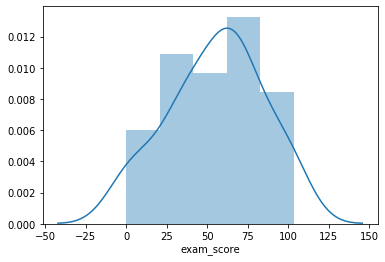

In [9]:
sns.distplot(df.exam_score)

4 easy steps for hypothesis testing (you won't believe number 3!)

0. Formulate hypothesis
1. Calculate our test statistic
2. Use that number to get a p-value
3. Conclude

$$ t = \frac{\bar{x} - \mu}{s / \sqrt{n}} $$

In [24]:
xbar = df[df.handedness == 'right'].exam_score.mean() # sample average
mu = df.exam_score.mean() # population average
s = df[df.handedness == 'right'].exam_score.std() # sample standard deviation
n = df[df.handedness == 'right'].shape[0] # sample size
degf = n - 1 # degrees of freedom (n - (# categories))

t = (xbar - mu) / (s / sqrt(n))
t

-0.48631566896917733

In [28]:
p = stats.t(degf).cdf(t) * 2
p

0.6315525853759332

In [34]:
alpha = .05

print(f'''
Because p ({p:.4}) > alpha ({alpha}), we fail to reject the null hypothesis, that there is no difference
in right-handed folks exam scores and the overall average.
''')


Because p (0.6316) > alpha (0.05), we fail to reject the null hypothesis, that there is no difference
in right-handed folks exam scores and the overall average.



Text(0, 0.5, 'p-value (two-tailed)')

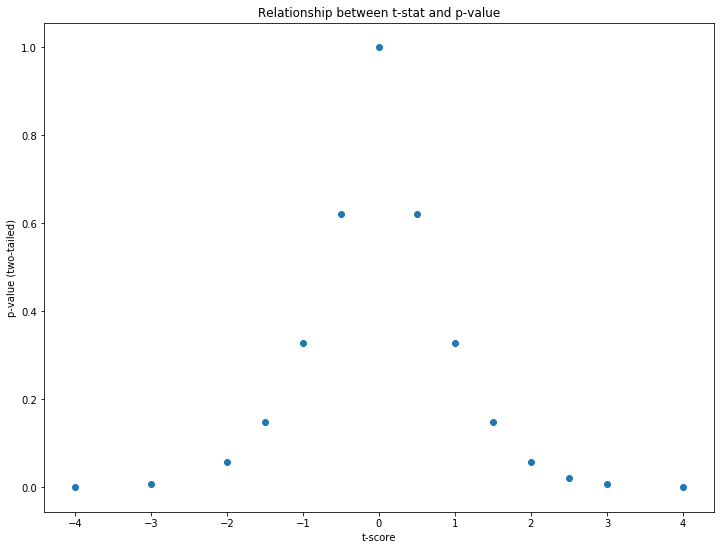

In [46]:
# what is the relationship between t-stat and p-value?
t = pd.Series([-4, -3, -2, -1.5, -1, -.5, 0, .5, 1, 1.5, 2, 2.5, 3, 4])

def p_value(t):
    return stats.t(degf).sf(abs(t)) * 2
#     return (stats.t(degf).sf(t) if t >= 0 else stats.t(degf).cdf(t)) * 2

p = [p_value(t) for t in t]

plt.figure(figsize=(12, 9))
plt.scatter(t, p)
plt.title('Relationship between t-stat and p-value')
plt.xlabel('t-score')
plt.ylabel('p-value (two-tailed)')

In [47]:
stats.t(degf).isf(.975)

-2.0738730679040147

## Two sample t-test

$H_0$: there is no difference in the means for the two subgroups

$$ t = \frac{\bar{x}_1 - \bar{x}_2}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} $$

$$ s_p = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 -2}} $$

- $H_0$: there is no difference in the exam scores for those who winged it and those who used flashcards to study
- $H_a$: there is a difference in the exam scores for those who winged it and those who used flashcards to study

In [48]:
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,Winged It,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


In [53]:
x1 = df[df.study_strategy == 'flashcards'].exam_score
x2 = df[df.study_strategy == 'Winged It'].exam_score

xbar1 = x1.mean()
xbar2 = x2.mean()

n1 = x1.shape[0]
n2 = x2.shape[0]

s1 = x1.std()
s2 = x2.std()

degf = (n1 + n2) - 2 # n - number of categories

s_p = sqrt(
    ((n1 - 1) * s1**2 + (n2 - 1) * s2**2)
    /
    (n1 + n2 - 2)
)

t = (xbar1 - xbar2) / (s_p * sqrt(1 / n1 + 1 / n2))

In [54]:
t

4.815353786038775

In [55]:
p = stats.t(degf).sf(t) * 2
p

2.359649566208761e-05

In [60]:
print(f'''
Because p ({p:.6f}) < alpha ({alpha}), we reject the null hypothesis:
that there is no difference in hte means for exam score between the two groups

in plain english: we think that these two groups are significantly different
''')


Because p (0.000024) < alpha (0.05), we reject the null hypothesis:
that there is no difference in hte means for exam score between the two groups

in plain english: we think that these two groups are significantly different



## The Easy Way

In [66]:
# one-sample t-test

x = df[df.handedness == 'right'].exam_score
mu = df.exam_score.mean()

# x should be a list of value (list, np.array, pd.Series)
# mu should be a single number
t_stat, p = stats.ttest_1samp(x, mu)

print(f't = {t_stat:.3}')
print(f'p = {p:.3}')

t = -0.486
p = 0.632


In [62]:
# two sample t-test
# x1 and x2 should be lists of values (list, np.array, pd.Series)
stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=4.815353786038775, pvalue=2.359649566208761e-05)